In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

file = 'ratings.csv'
df = pd.read_csv(file)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=1)
ratings_matrix = ratings_matrix.fillna(2.5)
ratings_matrix_csv = ratings_matrix.to_csv("ratings_matrix_csv", index=False)
R = ratings_matrix.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
U, sigma, Vt = svds( R_demeaned, k=3 )

def plot_matrix(matrix, title, title_of_plot, color):
    print(f"{title}: {matrix}")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    matrix = matrix[:30, :]
    ax.scatter(matrix[:, 0], matrix[:, 1], matrix[:, 2], color=color,s=50)
    ax.set_title(title_of_plot)
    plt.show()

U: [[-2.08499784e-02 -1.15821509e-01  8.28177801e-02]
 [-2.98927662e-02 -9.41663057e-02  2.17034354e-02]
 [ 8.23536874e-03 -2.16766922e-02 -3.98396359e-02]
 [-1.22550121e-01  1.50955828e-02  1.28989921e-02]
 [-6.82840866e-02  4.26949567e-02 -4.51460732e-02]
 [-1.14181395e-01 -4.82344545e-02  8.89232127e-02]
 [-8.50607964e-02 -2.30318584e-02  1.45243855e-01]
 [-3.55556486e-02  5.17507565e-02  8.59404085e-02]
 [-3.17073021e-02 -1.05758735e-01 -2.64982186e-03]
 [-5.73694765e-02  7.38875929e-02 -3.14378803e-02]
 [-1.23726982e-01 -7.07321142e-02 -3.20423018e-02]
 [ 2.70946443e-02  2.60885401e-02  2.26979725e-02]
 [ 7.84124983e-02 -9.13034259e-03  3.65602934e-02]
 [ 3.68026052e-03 -7.28245713e-03  5.24327894e-02]
 [-9.58317443e-02 -5.91562673e-02 -2.06178791e-02]
 [-1.45287323e-02 -2.53760277e-03  7.51041679e-02]
 [-6.48822414e-03 -6.21086878e-02  7.98761838e-02]
 [ 4.07234623e-03 -5.74074467e-03  7.42222594e-02]
 [-2.63062146e-02 -1.24364549e-01  1.02372284e-01]
 [ 9.41668343e-03  5.0844095

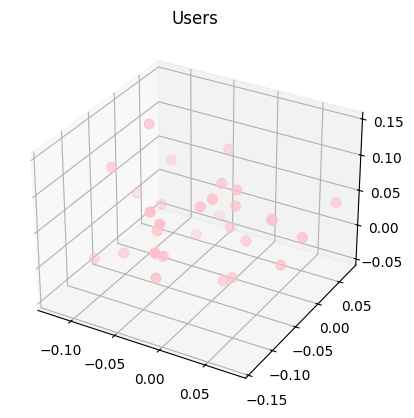

In [9]:
plot_matrix(U, 'U', 'Users', 'pink')

V: [[-0.08181812 -0.00964842 -0.04371503]
 [ 0.12441385 -0.04052386  0.0219222 ]
 [ 0.1489482   0.0751567   0.08651256]
 [ 0.15367547  0.01776883  0.17152798]
 [ 0.06212943 -0.02233269  0.02344039]
 [ 0.01982467 -0.05505607 -0.10734687]
 [-0.32731529 -0.19805376  0.17672526]
 [ 0.13740252  0.05046501  0.31282232]
 [-0.0418431   0.11872749  0.23592922]
 [-0.09755946  0.06781934  0.14991273]
 [-0.03898214  0.07717975 -0.13251503]
 [ 0.10971033 -0.02831199 -0.1966869 ]
 [ 0.07497748 -0.05156468 -0.18613453]
 [ 0.06387004 -0.06536921 -0.17452174]
 [ 0.05762604 -0.12836098 -0.08946214]
 [-0.05721558 -0.11362219 -0.06169717]
 [ 0.0603989   0.00592185  0.11059476]
 [ 0.13249673 -0.12598419  0.03010699]
 [-0.09927128  0.00906034 -0.14251647]
 [-0.08092492 -0.19308677  0.01916365]
 [ 0.07262925 -0.08672769 -0.11423696]
 [ 0.05086512 -0.05298166  0.1847609 ]
 [ 0.17325971 -0.11517729  0.13162252]
 [ 0.0679409  -0.06814985 -0.15616947]
 [-0.00312367 -0.03918929 -0.18072391]
 [ 0.09297871 -0.05619

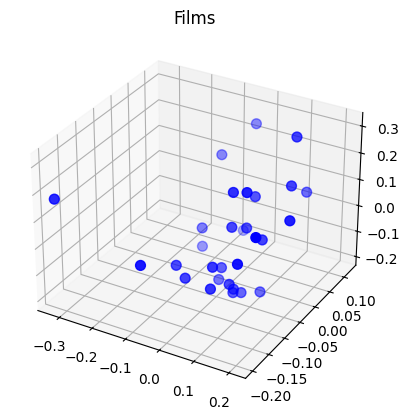

In [10]:
V = Vt.T
plot_matrix(V, 'V', 'Films', 'blue')